<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2022-03-15 to 2022-08-05
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


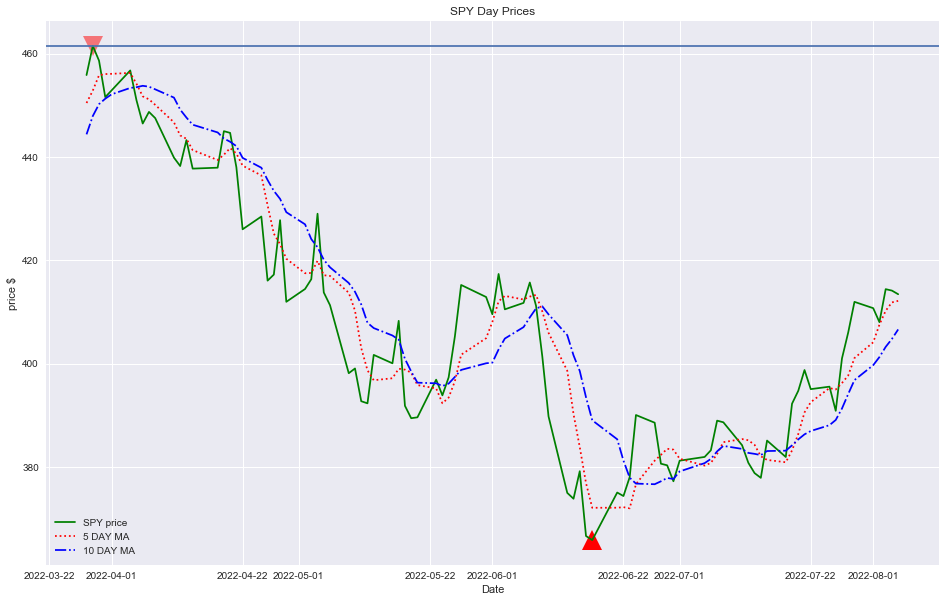

In [62]:
import pandas as pd
import pandas_datareader as pdr 
import requests
import matplotlib.pyplot as plt
import datetime
import numpy as np

API_KEY = 'FCBPPB0ZDIW2XCN7'
stock = 'SPY'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={API_KEY}'

raw_data = requests.get(url)
raw_data

data = raw_data.json()
d = data['Time Series (Daily)']

df = pd.DataFrame.from_dict(d, orient='index')
df.info()



df = df.applymap(pd.to_numeric)

# df["Date"] = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index)

df["5_DA_MA"] = df["4. close"].rolling(5).mean()

df["10_DAY_MA"] = df["4. close"].rolling(10).mean()

df.dropna(inplace = True)

max_price = df[df["4. close"] == df["4. close"].max()]
max_price_val = max_price.iloc[0,3]
max_price_date = max_price.index
max_price_val
max_price_date

min_price = df[df["4. close"] == df["4. close"].min()]
min_price_value = min_price.iloc[0, 3]
min_price_date = min_price.index
min_price_date

plt.figure(figsize=(16,10))
plt.style.use("seaborn")
plt.plot(max_price_date, max_price_val, marker='v', markersize=20, color="red", alpha=0.5)
plt.plot(min_price_date, min_price_value, marker = "^", markersize = 20, color = "red")
plt.plot( df['4. close'],c='green', label=f"{stock} price")
plt.plot( df['5_DA_MA'],c='red', linestyle=":", label="5 DAY MA")
plt.plot( df["10_DAY_MA"],c='blue',linestyle="-.",label="10 DAY MA");
plt.axhline(y = max_price_val)
plt.title(f'{stock} Day Prices')
plt.xlabel('Date')
plt.ylabel('price $')
plt.legend();
